## Accessing Text Corpora

### Gutenberg Corpus

In [7]:
import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [2]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

In [3]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma = gutenberg.words('austen-emma.txt')

In [6]:
# displays three statistics for each text: 
# average word length, average sentence length, and the number of times each vocabulary item appears in the text on average
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


In [7]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [9]:
print(macbeth_sentences[1116])

['Double', ',', 'double', ',', 'toile', 'and', 'trouble', ';', 'Fire', 'burne', ',', 'and', 'Cauldron', 'bubble']


In [12]:
longest_len = max(len(s) for s in macbeth_sentences)
longest_len

158

In [ ]:
# prints the longest sentence
[s for s in macbeth_sentences if len(s) == longest_len]

### Web and Chat Text

In [13]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [15]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
print(chatroom[123])

['i', 'do', "n't", 'want', 'hot', 'pics', 'of', 'a', 'female', ',', 'I', 'can', 'look', 'in', 'a', 'mirror', '.']


### Brown Corpus
It is a convenient resource for studying systematic differences between genres, a kind of linguistic inquiry known as **stylistics**.

In [2]:
from nltk.corpus import brown

brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [17]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [18]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [19]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [20]:
# end=' ' in order for the print function to put its output on a single line
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

In [21]:
cfd = nltk.ConditionalFreqDist(
          (genre, word)
          for genre in brown.categories()
          for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


### Reuters Corpus
90 topics, and grouped into two sets, called "training" and "test"

In [23]:
from nltk.corpus import reuters

# 10,788 documents
reuters.fileids()

In [25]:
print(reuters.categories())

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


In [26]:
# topics covered by one or more documents
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [27]:
# topics covered by one or more documents
reuters.categories(['training/9865', 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [30]:
# documents included in one or more categories
reuters.fileids('barley')

In [31]:
# documents included in one or more categories
reuters.fileids(['barley', 'corn'])

In [ ]:
reuters.words('training/9865')[:14]
['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', 'BIDS',
'DETAILED', 'French', 'operators', 'have', 'requested', 'licences', 'to', 'export']

reuters.words(['training/9865', 'training/9880'])
['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

reuters.words(categories='barley')
['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

reuters.words(categories=['barley', 'corn'])
['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]

### Inaugural Address Corpus

In [15]:
from nltk.corpus import inaugural

# collection of 55 texts, one for each presidential address
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [ ]:
# To get the year out of the filename, we extracted the first four characters, using fileid[:4]
[fileid[:4] for fileid in inaugural.fileids()]

All words in the Inaugural Address Corpus that begin with america or citizen are counted; separate counts are kept for each address; these are plotted so that trends in usage over time can be observed; counts are not normalized for document length

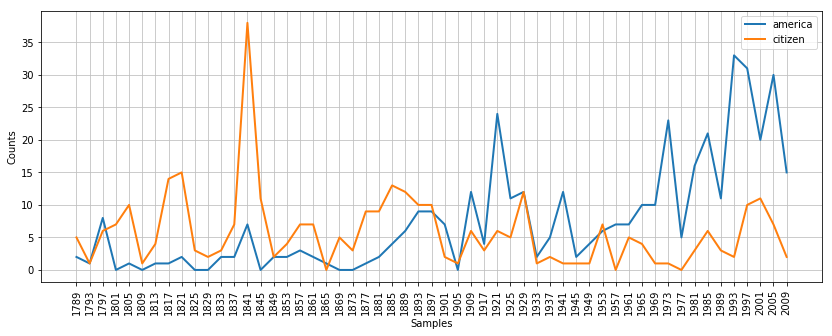

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[14,5])

cfd = nltk.ConditionalFreqDist(
          (target, fileid[:4])
          for fileid in inaugural.fileids()
          for w in inaugural.words(fileid)
          for target in ['america', 'citizen']
          if w.lower().startswith(target))
cfd.plot()

###  Text Corpus Structure
Basic Corpus Functionality defined in NLTK:

| Example                          | Description                                               |
| -------------------------------- | --------------------------------------------------------- |
| fileids()                        | the files of the corpus                                   |
| fileids([categories])            | the files of the corpus corresponding to these categories |
| categories()                     | the categories of the corpus                              |
| categories([fileids])            | the categories of the corpus corresponding to these files |
| raw()                            | the raw content of the corpus                             |
| raw(fileids=[f1,f2,f3])          | the raw content of the specified files                    |
| raw(categories=[c1,c2])          | the raw content of the specified categories               |
| words()                          | the words of the whole corpus                             |
| words(fileids=[f1,f2,f3])        | the words of the specified fileids                        |
| words(categories=[c1,c2])        | the words of the specified categories                     |
| sents()                          | the sentences of the whole corpus                         |
| sents(fileids=[f1,f2,f3])        | the sentences of the specified fileids                    |
| sents(categories=[c1,c2])        | the sentences of the specified categories                 |
| abspath(fileid)                  | the location of the given file on disk                    |
| encoding(fileid)                 | the encoding of the file (if known)                       |
| open(fileid)                     | open a stream for reading the given corpus file           |
| root                             | if the path to the root of locally installed corpus       |
| readme()                         | the contents of the README file of the corpus             |

### Corpora in Other Languages

In [17]:
nltk.corpus.cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [18]:
nltk.corpus.floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [19]:
 nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

In [22]:
# nltk.corpus.udhr.fileids()
nltk.corpus.udhr.words('Javanese-Latin1')[11:]

['Saben', 'umat', 'manungsa', 'lair', 'kanthi', 'hak', ...]

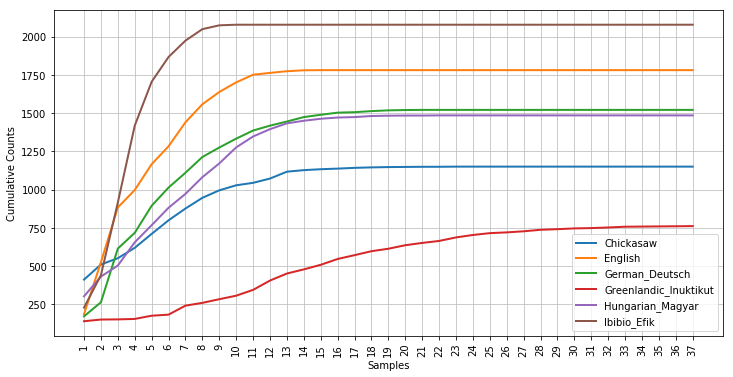

In [26]:
from nltk.corpus import udhr

plt.figure(figsize=[12,6])

languages = ['Chickasaw', 'English', 'German_Deutsch',
    'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
          (lang, len(word))
          for lang in languages
          for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

The above plot shows most of the English words are 7 letters and less.

###  Loading your own Corpus

In [42]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'C:/nltk_data/own'
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()

['one.txt', 'two.txt']

In [43]:
wordlists.words('one.txt')

['one', 'text', 'file', 'with', 'one', 'line']

## Conditional Frequency Distributions
### Conditions and Events

A conditional frequency distribution needs to pair each event with a condition. So instead of processing a sequence of words [1], we have to process a sequence of pairs [2]:
 	
text = ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...] [1]

pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...] [2]

### Counting Words by Genre

In [3]:
# For each genre [2], we loop over every word in the genre [3], producing pairs consisting of the genre and the word [1]
genre_word = [(genre, word) #1
              for genre in ['news', 'romance'] #2
              for word in brown.words(categories=genre)] #3
len(genre_word)

170576

In [4]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [5]:
genre_word[-4:]

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

In [8]:
cfd = nltk.ConditionalFreqDist(genre_word)

# type the name of the variable to inspect it
cfd

<ConditionalFreqDist with 2 conditions>

In [9]:
# verify it has two conditions
cfd.conditions()

['news', 'romance']

In [10]:
print(cfd['news'])

<FreqDist with 14394 samples and 100554 outcomes>


In [11]:
print(cfd['romance'])

<FreqDist with 8452 samples and 70022 outcomes>


In [14]:
cfd['romance'].most_common(10)

[(',', 3899),
 ('.', 3736),
 ('the', 2758),
 ('and', 1776),
 ('to', 1502),
 ('a', 1335),
 ('of', 1186),
 ('``', 1045),
 ("''", 1044),
 ('was', 993)]

In [13]:
cfd['romance']['could']

193

### Plotting and Tabulating Distributions
In the plot() and tabulate() methods, we can optionally specify which conditions to display with a conditions parameter.

In [27]:
cfd.tabulate(conditions=['English', 'German_Deutsch'], samples=range(10), cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


### Generating Random Text with Bigrams
The bigrams() function takes a list of words and builds a list of consecutive word pairs.

In [28]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven',
  'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

In [29]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

cfd['living']

FreqDist({'creature': 7, 'thing': 4, 'substance': 2, 'soul': 1, '.': 1, ',': 1})

This program obtains all bigrams from the text of the book of Genesis, then constructs a conditional frequency distribution to record which words are most likely to follow a given word; e.g., after the word living, the most likely word is creature; the generate_model() function uses this data, and a seed word, to generate random text.

In [30]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

**NLTK's Conditional Frequency Distributions**: commonly-used methods and idioms for defining, accessing, and visualizing a conditional frequency distribution of counters.

| Example | Distribution |
| ------- | ------------ |
| cfdist = ConditionalFreqDist(pairs) | create a conditional frequency distribution from a list of pairs |
| cfdist.conditions() | the conditions |
| cfdist[condition] | the frequency distribution for this condition |
| cfdist[condition][sample] | frequency for the given sample for this condition |
| cfdist.tabulate() | tabulate the conditional frequency distribution |
| cfdist.tabulate(samples, conditions) | tabulation limited to the specified samples and conditions |
| cfdist.plot() | graphical plot of the conditional frequency distribution |
| cfdist.plot(samples, conditions) | graphical plot limited to the specified samples and conditions |
| cfdist1 < cfdist2 | test if samples in cfdist1 occur less frequently than in cfdist2 |

## More Python: Reusing Code
###  Functions

In [31]:
# not always correct
def plural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'

In [32]:
plural('fairy')

'fairies'

In [33]:
plural('woman')

'women'

### Modules

NLTK's code for processing the Brown Corpus is an example of a **module**.

NLTK itself is a set of packages, sometimes called a **library**.

In [34]:
from text_proc import plural

plural('wish')

'wishes'

## Lexical Resources

A lexicon, or lexical resource, is a collection of words and/or phrases along with associated information such as part of speech and sense definitions.

For example, if we have defined a text my_text, then vocab = sorted(set(my_text)) builds the vocabulary of my_text, while word_freq = FreqDist(my_text) counts the frequency of each word in the text. Both of **vocab and word_freq** are simple lexical resources.

![lexicon](lexicon.png) 

A lexical entry consists of a **headword** (also known as a **lemma**) along with additional information such as the part of speech and the sense definition. Two distinct words having the same spelling are called **homonyms**.

### Wordlist Corpora

In [35]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [40]:
# unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

print(['abbeyland', 'abhorred', 'abilities', 'abounded', 'abridgement', 'abused', 'abuses',
'accents', 'accepting', 'accommodations', 'accompanied', 'accounted', 'accounts',
'accustomary', 'aches', 'acknowledging', 'acknowledgment', 'acknowledgments', ...])

['abbeyland', 'abhorred', 'abilities', 'abounded', 'abridgement', 'abused', 'abuses', 'accents', 'accepting', 'accommodations', 'accompanied', 'accounted', 'accounts', 'accustomary', 'aches', 'acknowledging', 'acknowledgment', 'acknowledgments', Ellipsis]


In [41]:
# unusual_words(nltk.corpus.nps_chat.words())

print(['aaaaaaaaaaaaaaaaa', 'aaahhhh', 'abortions', 'abou', 'abourted', 'abs', 'ack',
'acros', 'actualy', 'adams', 'adds', 'adduser', 'adjusts', 'adoted', 'adreniline',
'ads', 'adults', 'afe', 'affairs', 'affari', 'affects', 'afk', 'agaibn', 'ages', ...])

['aaaaaaaaaaaaaaaaa', 'aaahhhh', 'abortions', 'abou', 'abourted', 'abs', 'ack', 'acros', 'actualy', 'adams', 'adds', 'adduser', 'adjusts', 'adoted', 'adreniline', 'ads', 'adults', 'afe', 'affairs', 'affari', 'affects', 'afk', 'agaibn', 'ages', Ellipsis]


There is also a corpus of stopwords, that is, high-frequency words like the, to and also that we sometimes want to filter out of a document before further processing. Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts.

In [43]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [44]:
# Let's define a function to compute what fraction of words in a text are not in the stopwords list:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

In [45]:
content_fraction(nltk.corpus.reuters.words())

0.735240435097661

### A wordlist is useful for solving word puzzles.
![Target](target.png)

In [48]:
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 6
                     and obligatory in w
                     and nltk.FreqDist(w) <= puzzle_letters] #3

# It is trickier to check that candidate solutions only use combinations of the supplied letters, 
# especially since some of the supplied letters appear twice (here, the letter v). 
# The FreqDist comparison method [3] permits us to check that the frequency of each letter in the candidate word is less than or equal to the frequency of the corresponding letter in the puzzle.

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

In [49]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [52]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]
print(['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis',
'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel',
'Angie', 'Ariel', 'Ashley', 'Aubrey', 'Augustine', 'Austin', 'Averil', ...])

['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel', 'Angie', 'Ariel', 'Ashley', 'Aubrey', 'Augustine', 'Austin', 'Averil', Ellipsis]


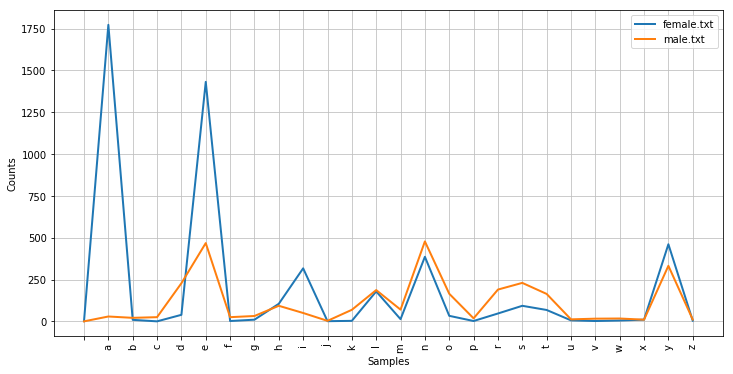

In [54]:
# It is well known that names ending in the letter a and e are almost always female

cfd = nltk.ConditionalFreqDist(
          (fileid, name[-1])
          for fileid in names.fileids()
          for name in names.words(fileid))

plt.figure(figsize=[12,6])
cfd.plot()

### A Pronouncing Dictionary
A slightly richer kind of lexical resource is a table (or spreadsheet), containing a word plus some properties in each row. NLTK includes the CMU Pronouncing Dictionary for US English, which was designed for use by speech synthesizers.

In [55]:
entries = nltk.corpus.cmudict.entries()
len(entries)

133737

In [56]:
# For each word, this lexicon provides a list of phonetic codes — distinct labels for each contrastive sound — known as phones
for entry in entries[42371:42379]:
    print(entry)

('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


Observe that fire has two pronunciations (in US English): the one-syllable F AY1 R, and the two-syllable  F AY1 ER0.

The symbols in the CMU Pronouncing Dictionary are from the _Arpabet_

In [57]:
for word, pron in entries: #1
    if len(pron) == 3: #2
        ph1, ph2, ph3 = pron #3
        if ph1 == 'P' and ph3 == 'T':
            print(word, ph2, end=' ')

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

[2] The above program scans the lexicon looking for entries whose pronunciation consists of three phones. 

[3] If the condition is true, it assigns the contents of pron to three new variables ph1, ph2 and ph3.

In [59]:
# Here's another example of the same for statement, this time used inside a list comprehension
syllable = ['N', 'IH0', 'K', 'S']
print([word for word, pron in entries if pron[-4:] == syllable])

["atlantic's", 'audiotronics', 'avionics', 'beatniks', 'calisthenics', 'centronics', 'chamonix', 'chetniks', "clinic's", 'clinics', 'conics', 'conics', 'cryogenics', 'cynics', 'diasonics', "dominic's", 'ebonics', 'electronics', "electronics'", "endotronics'", 'endotronics', 'enix', 'environics', 'ethnics', 'eugenics', 'fibronics', 'flextronics', 'harmonics', 'hispanics', 'histrionics', 'identics', 'ionics', 'kibbutzniks', 'lasersonics', 'lumonics', 'mannix', 'mechanics', "mechanics'", 'microelectronics', 'minix', 'minnix', 'mnemonics', 'mnemonics', 'molonicks', 'mullenix', 'mullenix', 'mullinix', 'mulnix', "munich's", 'nucleonics', 'onyx', 'organics', "panic's", 'panics', 'penix', 'pennix', 'personics', 'phenix', "philharmonic's", 'phoenix', 'phonics', 'photronics', 'pinnix', 'plantronics', 'pyrotechnics', 'refuseniks', "resnick's", 'respironics', 'sconnix', 'siliconix', 'skolniks', 'sonics', 'sputniks', 'technics', 'tectonics', 'tektronix', 'telectronics', 'telephonics', 'tonics', 'un

In [60]:
[w for w, pron in entries if pron[-1] == 'M' and w[-1] == 'n']

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn']

Notice that the one pronunciation is spelt in several ways: **nics, niks, nix**, even **ntic's** with a silent t

In [61]:
sorted(set(w[:2] for w, pron in entries if pron[0] == 'N' and w[0] != 'n'))

['gn', 'kn', 'mn', 'pn']

**The phones contain digits to represent primary stress (1), secondary stress (2) and no stress (0). As our final example, we define a function to extract the stress digits and then scan our lexicon to find words having a particular stress pattern.**

In [62]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]

In [65]:
[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']]
print(['abbreviated', 'abbreviated', 'abbreviating', 'accelerated', 'accelerating',
'accelerator', 'accelerators', 'accentuated', 'accentuating', 'accommodated',
'accommodating', 'accommodative', 'accumulated', 'accumulating', 'accumulative', ...])

['abbreviated', 'abbreviated', 'abbreviating', 'accelerated', 'accelerating', 'accelerator', 'accelerators', 'accentuated', 'accentuating', 'accommodated', 'accommodating', 'accommodative', 'accumulated', 'accumulating', 'accumulative', Ellipsis]


In [68]:
[w for w, pron in entries if stress(pron) == ['0', '2', '0', '1', '0']]
print(['abbreviation', 'abbreviations', 'abomination', 'abortifacient', 'abortifacients',
'academicians', 'accommodation', 'accommodations', 'accreditation', 'accreditations',
'accumulation', 'accumulations', 'acetylcholine', 'acetylcholine', 'adjudication', ])

['abbreviation', 'abbreviations', 'abomination', 'abortifacient', 'abortifacients', 'academicians', 'accommodation', 'accommodations', 'accreditation', 'accreditations', 'accumulation', 'accumulations', 'acetylcholine', 'acetylcholine', 'adjudication']


We can use a conditional frequency distribution to help us find minimally-contrasting sets of words. Here we find all the p-words consisting of three sounds [2], and group them according to their first and last sounds [1].

In [70]:
p3 = [(pron[0]+'-'+pron[2], word) #1
      for (word, pron) in entries
      if pron[0] == 'P' and len(pron) == 3] #2
cfd = nltk.ConditionalFreqDist(p3)
for template in sorted(cfd.conditions()):
    if len(cfd[template]) > 10:
        words = sorted(cfd[template])
        wordstring = ' '.join(words)
        print(template, wordstring[:70] + "...")

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's ...


In [71]:
# Rather than iterating over the whole dictionary, we can also access it by looking up particular words

prondict = nltk.corpus.cmudict.dict()
prondict['fire']

[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]

In [72]:
prondict['blog'] = [['B', 'L', 'AA1', 'G']]

In [73]:
prondict['blog']

[['B', 'L', 'AA1', 'G']]

We can use any lexical resource to process a text, e.g. to filter out words having some lexical property (like nouns), or mapping every word of the text.

For example, the following text-to-speech function looks up each word of the text in the pronunciation dictionary.

In [75]:
text = ['natural', 'language', 'processing']
print([ph for w in text for ph in prondict[w][0]])

['N', 'AE1', 'CH', 'ER0', 'AH0', 'L', 'L', 'AE1', 'NG', 'G', 'W', 'AH0', 'JH', 'P', 'R', 'AA1', 'S', 'EH0', 'S', 'IH0', 'NG']


### Comparative Wordlists
NLTK includes so-called Swadesh wordlists, lists of about 200 common words in several languages

In [77]:
from nltk.corpus import swadesh
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [83]:
swadesh.words('en')
print(['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that',
'here', 'there', 'who', 'what', 'where', 'when', 'how', 'not', 'all', 'many', 'some',
'few', 'other', 'one', 'two', 'three', 'four', 'five', 'big', 'long', 'wide', ...])

['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there', 'who', 'what', 'where', 'when', 'how', 'not', 'all', 'many', 'some', 'few', 'other', 'one', 'two', 'three', 'four', 'five', 'big', 'long', 'wide', Ellipsis]


In [84]:
fr2en = swadesh.entries(['fr', 'en'])
print([('je', 'I'), ('tu, vous', 'you (singular), thou'), ('il', 'he'), ...])

[('je', 'I'), ('tu, vous', 'you (singular), thou'), ('il', 'he'), Ellipsis]


In [85]:
translate = dict(fr2en)

In [87]:
translate['chien']

'dog'

In [89]:
de2en = swadesh.entries(['de', 'en'])    # German-English
es2en = swadesh.entries(['es', 'en'])    # Spanish-English
translate.update(dict(de2en))
translate.update(dict(es2en))

In [90]:
translate['Hund']

'dog'

In [91]:
translate['perro']

'dog'

In [92]:
# We can compare words in various Germanic and Romance languages:

languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [139, 140, 141, 142]:
    print(swadesh.entries(languages)[i])

('say', 'sagen', 'zeggen', 'decir', 'dire', 'dizer', 'dicere')
('sing', 'singen', 'zingen', 'cantar', 'chanter', 'cantar', 'canere')
('play', 'spielen', 'spelen', 'jugar', 'jouer', 'jogar, brincar', 'ludere')
('float', 'schweben', 'zweven', 'flotar', 'flotter', 'flutuar, boiar', 'fluctuare')


### Shoebox and Toolbox Lexicons
Perhaps the single most popular tool used by linguists for managing data is Toolbox, previously known as Shoebox since it replaces the field linguist's traditional shoebox full of file card.

A Toolbox file consists of a collection of entries, where each entry is made up of one or more fields. Most fields are optional or repeatable, which means that this kind of lexical resource cannot be treated as a table or spreadsheet

## WordNet
WordNet is a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure. NLTK includes the English WordNet, with 155,287 words and 117,659 synonym sets. We'll begin by looking at synonyms and how they are accessed in WordNet.

### Senses and Synonyms

In [93]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

The entity car.n.01 is called a synset, or "synonym set", a collection of synonymous words (or "lemmas")

In [94]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

Each word of a synset can have several meanings, e.g. car can also signify a train carriage, a gondola, or an elevator car. However, we are only interested in the single meaning that is common to all words of the above synset.

Synsets also come with a prose definition and some example sentences:

In [95]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [96]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

Although definitions help humans to understand the intended meaning of a synset, the words of the synset are often more useful for our programs. To eliminate ambiguity, we will identify these words as car.n.01.automobile,  car.n.01.motorcar, and so on. This pairing of a synset with a word is called a **lemma**. 

- We can get all the lemmas for a given synset [1],
- look up a particular lemma [2],
- get the synset corresponding to a lemma [3],
- and get the "name" of a lemma [4]:

In [97]:
wn.synset('car.n.01').lemmas() #1

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [98]:
wn.lemma('car.n.01.automobile') #2

Lemma('car.n.01.automobile')

In [99]:
wn.lemma('car.n.01.automobile').synset() #3

Synset('car.n.01')

In [100]:
wn.lemma('car.n.01.automobile').name() #4

'automobile'

In [101]:
# Unlike the word motorcar, which is unambiguous and has one synset, the word car is ambiguous, having five synsets:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [102]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [103]:
# For convenience, we can access all the lemmas involving the word car as follows.
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

### The WordNet Hierarchy

nodes correspond to synsets; edges indicate the hypernym/hyponym relation, i.e. the relation between superordinate and subordinate concepts.

![WordNetHierarchy](wordnet-hierarchy.png)

WordNet makes it easy to navigate between concepts. For example, given a concept like motorcar, we can look at the concepts that are more specific; the (immediate) hyponyms.

In [107]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0]

Synset('ambulance.n.01')

In [109]:
print(sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas()))

['Model_T', 'S.U.V.', 'SUV', 'Stanley_Steamer', 'ambulance', 'beach_waggon', 'beach_wagon', 'bus', 'cab', 'compact', 'compact_car', 'convertible', 'coupe', 'cruiser', 'electric', 'electric_automobile', 'electric_car', 'estate_car', 'gas_guzzler', 'hack', 'hardtop', 'hatchback', 'heap', 'horseless_carriage', 'hot-rod', 'hot_rod', 'jalopy', 'jeep', 'landrover', 'limo', 'limousine', 'loaner', 'minicar', 'minivan', 'pace_car', 'patrol_car', 'phaeton', 'police_car', 'police_cruiser', 'prowl_car', 'race_car', 'racer', 'racing_car', 'roadster', 'runabout', 'saloon', 'secondhand_car', 'sedan', 'sport_car', 'sport_utility', 'sport_utility_vehicle', 'sports_car', 'squad_car', 'station_waggon', 'station_wagon', 'stock_car', 'subcompact', 'subcompact_car', 'taxi', 'taxicab', 'tourer', 'touring_car', 'two-seater', 'used-car', 'waggon', 'wagon']


We can also navigate up the hierarchy by visiting **hypernyms**. Some words have multiple paths, because they can be classified in more than one way. There are two paths between car.n.01 and entity.n.01 because wheeled_vehicle.n.01 can be classified as both a vehicle and a container.

In [110]:
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [112]:
paths = motorcar.hypernym_paths()
len(paths)

2

In [113]:
[synset.name() for synset in paths[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'container.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [114]:
[synset.name() for synset in paths[1]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'conveyance.n.03',
 'vehicle.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

We can get the most general hypernyms (or root hypernyms) of a synset as follows:

In [115]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

### More Lexical Relations

Hypernyms and hyponyms are called lexical relations because they relate one synset to another. These two relations navigate up and down the "is-a" hierarchy. Another important way to navigate the WordNet network is from items to their components (**meronyms**) or to the things they are contained in (**holonyms**).

In [116]:
# the parts of a tree are its trunk, crown, and so on; the part_meronyms().
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [117]:
# The substance a tree is made of includes heartwood and sapwood; the substance_meronyms()
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [118]:
# A collection of trees forms a forest; the member_holonyms()
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

To see just how intricate things can get, consider the word mint, which has several closely-related senses. We can see that mint.n.04 is part of mint.n.02 and the substance from which mint.n.05 is made.

In [119]:
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name() + ':', synset.definition())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [120]:
wn.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [121]:
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

There are also relationships between verbs. For example, the act of walking involves the act of stepping, so walking **entails** stepping. Some verbs have multiple entailments:

In [122]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [123]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [124]:
wn.synset('tease.v.03').entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

Some lexical relationships hold between lemmas, e.g., antonymy:

In [125]:
wn.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

In [126]:
wn.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]

In [127]:
wn.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('vertical.a.01.vertical'), Lemma('inclined.a.02.inclined')]

In [128]:
wn.lemma('staccato.r.01.staccato').antonyms()

[Lemma('legato.r.01.legato')]

### Semantic Similarity
We have seen that synsets are linked by a complex network of lexical relations. Given a particular synset, we can traverse the WordNet network to find synsets with related meanings. Knowing which words are semantically related is useful for indexing a collection of texts, so that a search for a general term like vehicle will match documents containing specific terms like limousine.

Recall that each synset has one or more hypernym paths that link it to a root hypernym such as entity.n.01. Two synsets linked to the same root may have several hypernyms in common. If two synsets share a very specific hypernym — one that is low down in the hypernym hierarchy — they must be closely related.

In [129]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')
right.lowest_common_hypernyms(minke)

[Synset('baleen_whale.n.01')]

In [130]:
right.lowest_common_hypernyms(orca)

[Synset('whale.n.02')]

In [131]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [132]:
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

Of course we know that whale is very specific (and baleen whale even more so), while vertebrate is more general and entity is completely general. We can quantify this concept of generality by looking up the depth of each synset:

In [133]:
wn.synset('baleen_whale.n.01').min_depth()

14

In [135]:
wn.synset('whale.n.02').min_depth()

13

In [136]:
wn.synset('vertebrate.n.01').min_depth()

8

In [137]:
wn.synset('entity.n.01').min_depth()

0

Similarity measures have been defined over the collection of WordNet synsets which incorporate the above insight. For example, path_similarity assigns a score in the range 0–1 based on the shortest path that connects the concepts in the hypernym hierarchy (-1 is returned in those cases where a path cannot be found). Comparing a synset with itself will return 1. Consider the following similarity scores, relating right whale to minke whale, orca, tortoise, and novel. Although the numbers won't mean much, they decrease as we move away from the semantic space of sea creatures to inanimate objects.

In [138]:
right.path_similarity(minke)

0.25

In [139]:
right.path_similarity(orca)

0.16666666666666666

In [140]:
right.path_similarity(tortoise)

0.07692307692307693

In [141]:
right.path_similarity(novel)

0.043478260869565216